<font color="DD740A">
<h1>Curso de Machine Learning con Python</h1> 
<h3>Tema7: Machine Learning con Python</h3>
<h4>Regresión (Ejercicio)</h4>    
</font>    

*Autor: ITI*<br>
*Copyright 2020 Instituto Tecnológico de Informática (ITI). Prohibida la reproducción total o parcial sin permiso del ITI*

# Importar librerías

In [6]:
# Representing and analyzing data
import pandas as pd 
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

# Visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.dates as md
import plotly 
import plotly.graph_objs as go

# Basic numerical computation
import numpy as np 
# Scientific computation, including statistics
import scipy as sp 
# Regression and other statistical analysis
import statsmodels as sm 
# Operating Systems functionalities
import os

# Machine Learning
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [4]:
!pip3 install "notebook>=5.3" "ipywidgets>=7.2"

In [5]:
!pip3 install plotly==4.12.0

In [7]:
sns.set_style("whitegrid")

# MODELADO DE ALGORITMOS DE ML

- Importamos con pandas dataframe
- Exploramos los datos
- Realizamos el modelado con arrays de Numpy 

# (1) REGRESIÓN

# Regresión Lineal Simple

In [8]:
from sklearn import linear_model

In [27]:
# Visualizar el directorio actual
os.getcwd()

'C:\\Users\\aulafor\\Desktop'

In [25]:
# Establecer el Source Directory, donde se encuentran los datos
sDir = '/Data/'

In [29]:
cd Data

C:\Users\aulafor\Desktop\b\Data


In [32]:
# Identificar los ficheros del directorio indicado
!ls 

NameError: name 'ls' is not defined

Dataset: Olimpiadas<br>
Se trata de un set de datos que contiene las mejores marcas conseguidas en cada uno de los juegos olímpicos desde el inicio de los tiempos, en las disciplinas de salto de altura, lanzamiento de disco y salto de longitud

Diccionario de datos:

    - high_jump: Salto de altura
    - Discuss_Throw: Lanzamiento de disco
    - long_jump: Salto de longitud
    - year:Año en el que se obtuvo la marca

In [ ]:
# Visualizar el dataset en Visual Studio

In [44]:
# Cargar el dataset de las olimpiadas "olympics"
df_olympics = pd.read_csv("olympic.txt",sep=('\t'))  #/t se refiere a tabulación (valores separados por)

In [57]:
pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install 

[I 18:45:35 InstallContribNbextensionsApp] jupyter contrib nbextension install 
[I 18:45:35 InstallContribNbextensionsApp] Installing jupyter_contrib_nbextensions nbextension files to jupyter data directory
[I 18:45:35 InstallContribNbextensionsApp] Installing c:\users\aulafor\anaconda3\lib\site-packages\jupyter_contrib_nbextensions\nbextensions\addbefore -> addbefore
[I 18:45:35 InstallContribNbextensionsApp] Making directory: C:\ProgramData\jupyter\nbextensions\addbefore\
[I 18:45:35 InstallContribNbextensionsApp] Copying: c:\users\aulafor\anaconda3\lib\site-packages\jupyter_contrib_nbextensions\nbextensions\addbefore\addbefore.yaml -> C:\ProgramData\jupyter\nbextensions\addbefore\addbefore.yaml
[I 18:45:35 InstallContribNbextensionsApp] Copying: c:\users\aulafor\anaconda3\lib\site-packages\jupyter_contrib_nbextensions\nbextensions\addbefore\icon.png -> C:\ProgramData\jupyter\nbextensions\addbefore\icon.png
[I 18:45:35 InstallContribNbextensionsApp] Copying: c:\users\aulafor\anaconda


[I 18:45:35 InstallContribNbextensionsApp] Making directory: C:\ProgramData\jupyter\nbextensions\autoscroll\
[I 18:45:35 InstallContribNbextensionsApp] Copying: c:\users\aulafor\anaconda3\lib\site-packages\jupyter_contrib_nbextensions\nbextensions\autoscroll\autoscroll.yaml -> C:\ProgramData\jupyter\nbextensions\autoscroll\autoscroll.yaml
[I 18:45:35 InstallContribNbextensionsApp] Copying: c:\users\aulafor\anaconda3\lib\site-packages\jupyter_contrib_nbextensions\nbextensions\autoscroll\icon.png -> C:\ProgramData\jupyter\nbextensions\autoscroll\icon.png
[I 18:45:35 InstallContribNbextensionsApp] Copying: c:\users\aulafor\anaconda3\lib\site-packages\jupyter_contrib_nbextensions\nbextensions\autoscroll\main.js -> C:\ProgramData\jupyter\nbextensions\autoscroll\main.js
[I 18:45:35 InstallContribNbextensionsApp] Copying: c:\users\aulafor\anaconda3\lib\site-packages\jupyter_contrib_nbextensions\nbextensions\autoscroll\README.md -> C:\ProgramData\jupyter\nbextensions\autoscroll\README.md
[I 1

#### EDA DEL DATASET OLYMPICS

In [45]:
# Primeras filas
df_olympics.head()

,high_jump,Discus_Throw,long_jump,year
0,71.25,1147.5,249.750,-4
1,74.80,1418.9,282.875,0
2,71.00,1546.5,289.000,4
3,75.00,1610.0,294.500,8
4,76.00,1780.0,299.250,12


In [46]:
# Ultimas filas
df_olympics.tail()

,high_jump,Discus_Throw,long_jump,year
15,88.25,2550.5,350.50,68
16,87.75,2535.0,324.50,72
17,88.50,2657.4,328.50,76
18,92.75,2624.0,336.25,80
19,92.50,2622.0,336.25,84


In [47]:
# Informacion detallada
df_olympics.describe()

,high_jump,Discus_Throw,long_jump,year
count,20.000000,20.000000,20.000000,20.000000
mean,80.915375,2053.113750,307.028125,41.000000
std,6.639621,439.892195,23.086423,28.635642
min,71.000000,1147.500000,249.750000,-4.000000
25%,76.187500,1774.812500,294.156250,18.000000
50%,78.968750,2032.687500,306.375000,42.000000
75%,86.250000,2434.875000,320.937500,65.000000
max,92.750000,2657.400000,350.500000,84.000000


In [56]:
df_olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   high_jump     20 non-null     float64
 1   Discus_Throw  20 non-null     float64
 2   long_jump     20 non-null     float64
 3   year          20 non-null     int64  
dtypes: float64(3), int64(1)
memory usage: 768.0 bytes


In [48]:
# Matriz de correlaciones de Pearson
df_olympics.corr()

,high_jump,Discus_Throw,long_jump,year
high_jump,1.000000,0.952912,0.881625,0.958703
Discus_Throw,0.952912,1.000000,0.922358,0.983511
long_jump,0.881625,0.922358,1.000000,0.872412
year,0.958703,0.983511,0.872412,1.000000


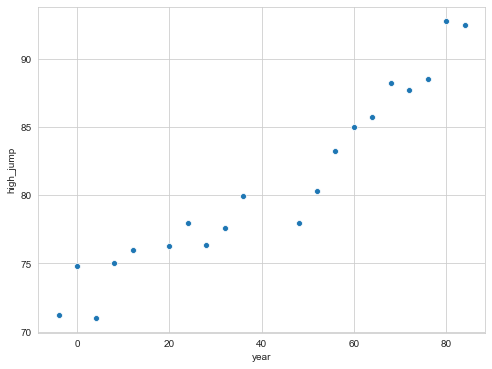

In [66]:
# Visualizar la relación lineal entre las variables

fig, ax =plt.subplots(1,1,figsize = (8,6))

sns.scatterplot (x = "year", y = "high_jump", data = df_olympics)


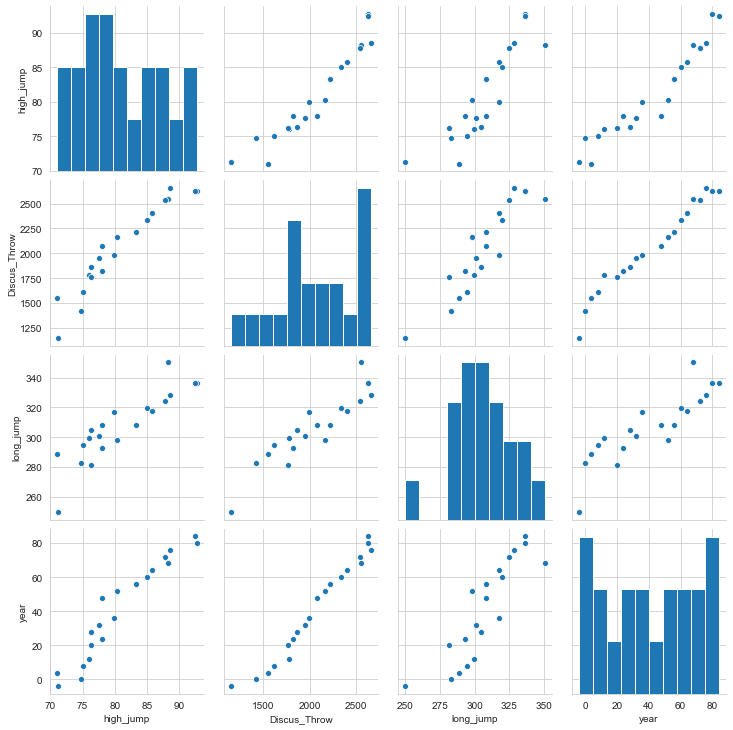

In [49]:
sns.pairplot(df_olympics)


In [54]:
import pandas_profiling as pdprof

profile = pdprof.ProfileReport(df_olympics)
profile

#### MODELAR CON UNA REGRESIÓN LINEAL SIMPLE EL SALTO DE ALTURA

In [58]:
from sklearn import linear_model

In [61]:
# Obtener los vectores X e Y

# Convertir el dataftame de Pandas en arrays de Numpy
## Variable objetivo (y): high_jump 
## Variables predictoras (X): year

# Identificamos las variables de X e y
colX = ['year']
colY = ['high_jump']

In [62]:
# Convertimos los vectores X e y a arrays de Numpy para poder realizar los cálculos posteriores

X = df_olympics.loc[:,colX].values.reshape(-1,len(colX))
y = df_olympics.loc[:,colY].values.reshape(-1,len(colY))

In [63]:
X

array([[-4],
       [ 0],
       [ 4],
       [ 8],
       [12],
       [20],
       [24],
       [28],
       [32],
       [36],
       [48],
       [52],
       [56],
       [60],
       [64],
       [68],
       [72],
       [76],
       [80],
       [84]], dtype=int64)

In [64]:
y

array([[71.25  ],
       [74.8   ],
       [71.    ],
       [75.    ],
       [76.    ],
       [76.25  ],
       [78.    ],
       [76.375 ],
       [77.625 ],
       [79.9375],
       [78.    ],
       [80.32  ],
       [83.25  ],
       [85.    ],
       [85.75  ],
       [88.25  ],
       [87.75  ],
       [88.5   ],
       [92.75  ],
       [92.5   ]])

In [67]:
## Training: Datos conocidos usados para entrenar el modelo

X_train = X[:20]  # Selecciona las primeras 20 filas
y_train = y[:20]

## Test: Datos de futuro, no conocidos por el modelo y usados para evaluarlo posteriormente
X_test = np.array(['88', '92', '96', '100', '104', '108', '112', '116']).reshape(-1,1).astype(np.float64) 
y_test = np.array(['92.8','93.6','94.8','95.6','96.4','97.2','96.4','99.2']).reshape(-1,1).astype(np.float64) 

In [69]:
# Creamos el objeto del modelo de Regresión Lineal
lr = linear_model.LinearRegression()

In [70]:
# Entrenamos el modelo con los datos conocidos

lr.fit(X_train,y_train)

LinearRegression()

In [71]:
# Predecimos con los datos a futuro (datos nunca vistos)

y_pred = lr.predict(X_test)

Coeficientes: 
 [[0.22229028]]
Mean squared error (MSE): 1.99
R2. Varianza explicada: 0.45


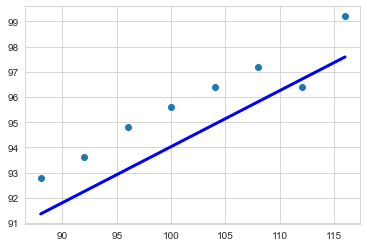

In [72]:
# Evaluación del modelo
from sklearn.metrics import mean_squared_error, r2_score

# El coeficiente. Pendiente o vaor que multiplicado a la X, modela la Y
print('Coeficientes: \n', lr.coef_)

# El Error Cuadrático Medio (MSE)
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_test, y_pred))

# R2.Varianza de Y explicada por el modelo: 1 es una predicción perfecta 
print('R2. Varianza explicada: %.2f' % r2_score(y_test, y_pred))

# Visualizamos las predicciones contra la realidad
plt.scatter(X_test, y_test) # Realidad
plt.plot(X_test, y_pred, color='blue', linewidth=3) # Predicciones

### Ejercicio: Realizar el mismo análisis con 'Salto de longitud' y con 'Lanzamiento de disco' #


In [84]:
# Identificamos las variables de X e y
colX = ['year']
colY = ['long_jump']

# Convertimos los vectores X e y a arrays de Numpy para poder realizar los cálculos posteriores
X = df_olympics.loc[:,colX].values.reshape(-1,len(colX))
y = df_olympics.loc[:,colY].values.reshape(-1,len(colY))

In [85]:
## SALTO DE LONGITUD
X_train = X[:20]  # Selecciona las primeras 20 filas
y_train = y[:20]
# Salto de Longitud: Datos futuros
X_test_long = np.array(['88', '92', '96', '100', '104', '108', '112', '116']).reshape(-1,1).astype(np.float64) # Selecciona las 5 últimas filas
y_test_long = np.array(['339.5','341','341.4','344.8','348','350.9','353','353.3']).reshape(-1,1).astype(np.float64)  # Selecciona las 5 últimas filas


In [86]:
# Creamos el objeto del modelo de Regresión Lineal
lr = linear_model.LinearRegression()
# Entrenamos el modelo con los datos conocidos
lr.fit(X_train,y_train)
# Predecimos con los datos a futuro (datos nunca vistos)
y_pred = lr.predict(X_test_long)

Coeficientes: 
 [[0.70334965]]
Mean squared error (MSE): 14.48
R2. Varianza explicada: 0.47


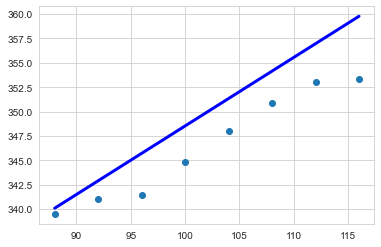

In [88]:
# Evaluación del modelo
from sklearn.metrics import mean_squared_error, r2_score

# El coeficiente. Pendiente o vaor que multiplicado a la X, modela la Y
print('Coeficientes: \n', lr.coef_)

# El Error Cuadrático Medio (MSE)
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_test_long, y_pred))

# R2.Varianza de Y explicada por el modelo: 1 es una predicción perfecta 
print('R2. Varianza explicada: %.2f' % r2_score(y_test_long, y_pred))

# Visualizamos las predicciones contra la realidad
plt.scatter(X_test_long, y_test_long) # Realidad
plt.plot(X_test_long, y_pred, color='blue', linewidth=3) # Predicciones

## Discus_Throw

In [89]:
# Identificamos las variables de X e y
colX = ['year']
colY = ['Discus_Throw']

# Convertimos los vectores X e y a arrays de Numpy para poder realizar los cálculos posteriores
X = df_olympics.loc[:,colX].values.reshape(-1,len(colX))
y = df_olympics.loc[:,colY].values.reshape(-1,len(colY))

In [90]:
## SALTO DE LONGITUD
X_train = X[:20]  # Selecciona las primeras 20 filas
y_train = y[:20]
# Salto de Longitud: Datos futuros
## LANZAMIENTO DE DISCO

# Lanzamiento de Disco: Datos futuros
X_test_disco = np.array(['88', '92', '96', '100', '104', '108', '112', '116']).reshape(-1,1).astype(np.float64) # Selecciona las 5 últimas filas
y_test_disco = np.array(['2760.424','2783.123','2840.645','2870.764','3020.345','3005.563','3056.675','3089.844']).reshape(-1,1).astype(np.float64)  

In [91]:
# Creamos el objeto del modelo de Regresión Lineal
lr = linear_model.LinearRegression()
# Entrenamos el modelo con los datos conocidos
lr.fit(X_train,y_train)
# Predecimos con los datos a futuro (datos nunca vistos)
y_pred = lr.predict(X_test_disco)

Coeficientes: 
 [[15.10839698]]
Mean squared error (MSE): 3357.69
R2. Varianza explicada: 0.77


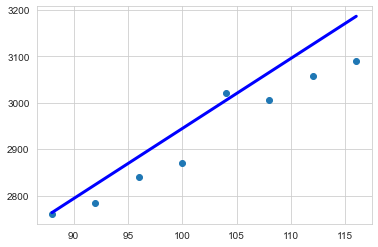

In [92]:
# Evaluación del modelo
from sklearn.metrics import mean_squared_error, r2_score

# El coeficiente. Pendiente o vaor que multiplicado a la X, modela la Y
print('Coeficientes: \n', lr.coef_)

# El Error Cuadrático Medio (MSE)
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_test_disco, y_pred))

# R2.Varianza de Y explicada por el modelo: 1 es una predicción perfecta 
print('R2. Varianza explicada: %.2f' % r2_score(y_test_disco, y_pred))

# Visualizamos las predicciones contra la realidad
plt.scatter(X_test_disco, y_test_disco) # Realidad
plt.plot(X_test_disco, y_pred, color='blue', linewidth=3) # Predicciones

# Regresión lineal múltiple

In [ ]:
from sklearn import linear_model

Dataset: crime.csv

- La base de datos crime.csv contiene indicadores de los delitos en varios estados de EEUU (las dos primeras columnas) y variables como el gasto per capita en policía, el número de graduados de secundaria, etc.
- Hacer un análisis exploratorio de los datos, con especial atención a las correlaciones.
- Hacer un modelo de regresión múltiple que explique la variable 1 (Delitos por millón de habitantes) mediante las variables 3, 4, 5, 6 y 7
- Hacer un sumario e interpretar los resultados. ¿Qué variables son significativas en el modelo? ¿Qué es llamativo respecto al presupuesto policial?

In [ ]:
# Visualizar el dataset en Visual Studio

In [96]:
! dir

 El volumen de la unidad C no tiene etiqueta.
 El n£mero de serie del volumen es: B8CD-2193

 Directorio de C:\Users\aulafor\Desktop\b\Data

28/10/2020  19:35    <DIR>          .
28/10/2020  19:35    <DIR>          ..
28/10/2020  19:35            17.676 crime.csv
19/10/2020  18:27             3.975 iris.csv
28/10/2020  18:22               459 olympic.txt
26/10/2020  18:53           798.448 sensores_Temp-Hum.csv
26/10/2020  14:33            83.839 titanic_data.csv
26/10/2020  18:31            45.895 titanic_prepared.csv
               6 archivos        950.292 bytes
               2 dirs  280.500.555.776 bytes libres


In [97]:
# Cargar el dataset
df_crime = pd.read_csv("crime.csv") 

#### EDA

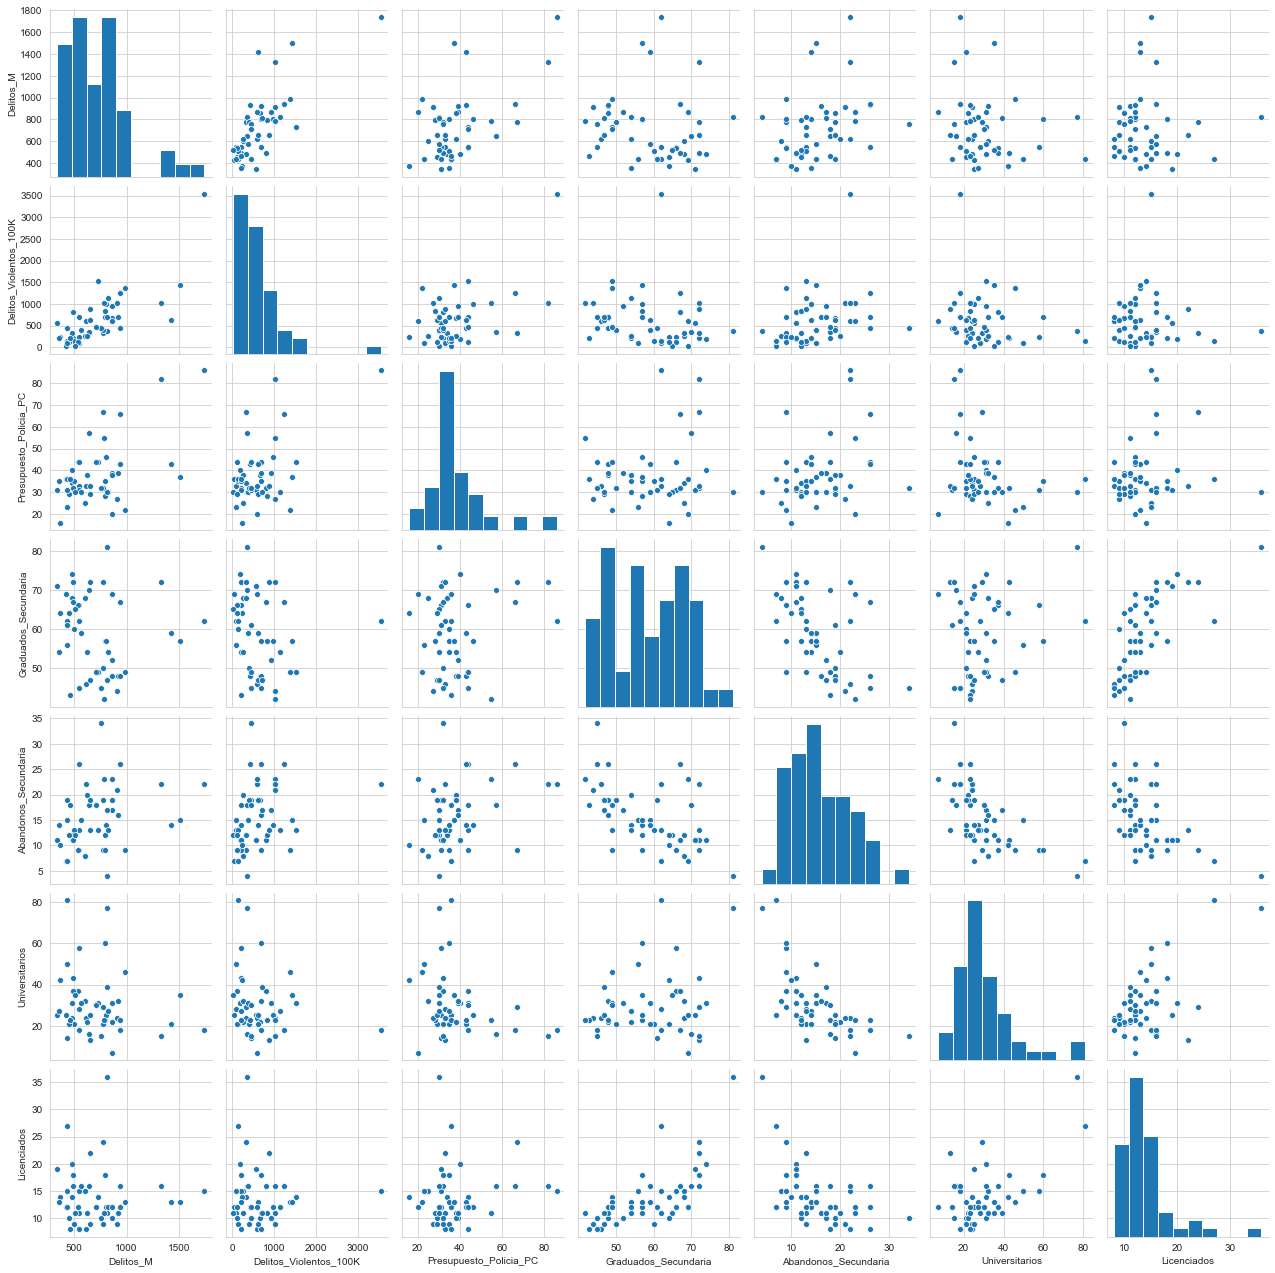

In [100]:
# Visualizar la relación lineal entre las variables Delitos_M y Presupuesto_Policia_PC

sns.pairplot(df_crime)

In [101]:
df_crime.corr()

,Delitos_M,Delitos_Violentos_100K,Presupuesto_Policia_PC,Graduados_Secundaria,Abandonos_Secundaria,Universitarios,Licenciados
Delitos_M,1.000000,0.756505,0.533198,-0.135459,0.322519,-0.175224,-0.026283
Delitos_Violentos_100K,0.756505,1.000000,0.509339,-0.184445,0.291031,-0.199070,-0.045570
Presupuesto_Policia_PC,0.533198,0.509339,1.000000,0.120265,0.311526,-0.277475,0.124502
Graduados_Secundaria,-0.135459,-0.184445,0.120265,1.000000,-0.537162,0.182364,0.681072
Abandonos_Secundaria,0.322519,0.291031,0.311526,-0.537162,1.000000,-0.626953,-0.513958
Universitarios,-0.175224,-0.199070,-0.277475,0.182364,-0.626953,1.000000,0.591663
Licenciados,-0.026283,-0.045570,0.124502,0.681072,-0.513958,0.591663,1.000000


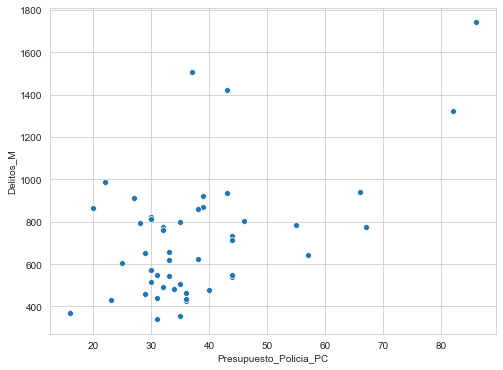

In [102]:
fig, ax =plt.subplots(1,1,figsize = (8,6))

sns.scatterplot (x = "Presupuesto_Policia_PC", y = "Delitos_M", data = df_crime)

In [103]:
df_crime.columns

Index(['Delitos_M', 'Delitos_Violentos_100K', 'Presupuesto_Policia_PC',
       'Graduados_Secundaria', 'Abandonos_Secundaria', 'Universitarios',
       'Licenciados'],
      dtype='object')

#### MODELAR CON UNA REGRESIÓN LINEAL POLINÓMICA EL NÚMERO DE DELITOS POR MILLÓN

In [99]:
df_crime.head()
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Delitos_M               50 non-null     int64
 1   Delitos_Violentos_100K  50 non-null     int64
 2   Presupuesto_Policia_PC  50 non-null     int64
 3   Graduados_Secundaria    50 non-null     int64
 4   Abandonos_Secundaria    50 non-null     int64
 5   Universitarios          50 non-null     int64
 6   Licenciados             50 non-null     int64
dtypes: int64(7)
memory usage: 2.9 KB


In [104]:
## Vector X & Vector Y

# Convertir el dataftame de Pandas en arrays de Numpy
# Variable objetivo (y): Delitos_M 
# Variables predictoras (X): Columnas de la 3 a la 7

# Obtenemos el índice de las columnas de X e y
colX = ['Presupuesto_Policia_PC','Graduados_Secundaria', 'Abandonos_Secundaria', 'Universitarios','Licenciados']
colY = ['Delitos_M']


# Extraemos el vector X e y como arrays de Numpy para poder realizar los cálculos posteriores
X = df_crime.loc[:,colX].values.reshape(-1,len(colX))
y = df_crime.loc[:,colY].values.reshape(-1,len(colY))

In [107]:
# Dividir los datos en training/test (80-20)

from sklearn.model_selection import train_test_split

train_test_split # Realiza la partición barajando los datos automáticamente


# create training and testing vars

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(40, 5) (40, 1)
(10, 5) (10, 1)


In [108]:
# Creamos el objeto del modelo de Regresión Lineal
lr = linear_model.LinearRegression()

In [109]:
# Entrenamos el modelo con los datos conocidos

lr.fit(X_train,y_train)

LinearRegression()

In [110]:
# Predecimos con los datos a futuro (datos nunca vistos)

y_pred = lr.predict(X_test)

In [111]:
# Evaluación del modelo
from sklearn.metrics import mean_squared_error, r2_score

# Los coeficientes. Número que multiplicado a la X, modela la Y
print('Coeficientes: \n', lr.coef_)

# El Error Cuadrático Medio (MSE)
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_test, y_pred))

# R2.Varianza de Y explicada por el modelo: 1 es una predicción perfecta 
print('R2. Varianza explicada: %.2f' % r2_score(y_test, y_pred))



Coeficientes: 
 [[10.23386941 -8.27327964  8.5648909   2.93186417 10.29987882]]
Mean squared error (MSE): 48660.94
R2. Varianza explicada: 0.31


In [ ]:
['Presupuesto_Policia_PC','Graduados_Secundaria', 'Abandonos_Secundaria', 'Universitarios','Licenciados']


In [112]:
list(colX)

['Presupuesto_Policia_PC',
 'Graduados_Secundaria',
 'Abandonos_Secundaria',
 'Universitarios',
 'Licenciados']

#### CROSS VALIDATION

In [ ]:
from  sklearn.model_selection  import  cross_val_score 
from sklearn import metrics

lrm = linear_model.LinearRegression()
scores = cross_val_score(lrm, X_train, y_train, cv=5, scoring='r2')

print("Matriz de Puntuaciones por validación cruzada: " + str(scores))
print ( "R2 medio: % 0.2f (+/- % 0.2f )"  %  ( scores.mean (),  scores.std ()  *  2 )) 

6

# Extra point: Ordinary Least Squares (OLS)

In [ ]:
# Para visualizar más estadísticos, se puede utilizar una aproximación por "Ordinary Least Squares (OLS)"
# Esto supone utilizar otro modelo distinto al anterior. En este caso el OLS, de ahí que los parámetros obtenidos sean diferentes
# Sin embargo esto proporciona una cantidad de información mucho mayor que la función "linear_model" de scikit-learn
import statsmodels.api as sm

X = np.concatenate((X_train , X_test), axis=0)
y = np.concatenate((y_train , y_test), axis=0)

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())